In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic3.csv")

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df['age'] = df['age'].fillna(df['age'].mean())

In [4]:
df['fare'] = df['fare'].fillna(df['fare'].mean())

In [5]:
df['embarked'].mode()

0    S
dtype: object

In [6]:
df['embarked'] = df['embarked'].fillna('S')

# Visualizing the Data Sets

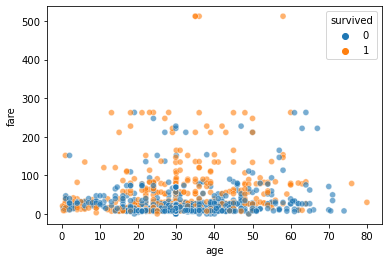

In [11]:
sns.scatterplot(data=df, x="age", y="fare",hue='survived', alpha=0.6);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


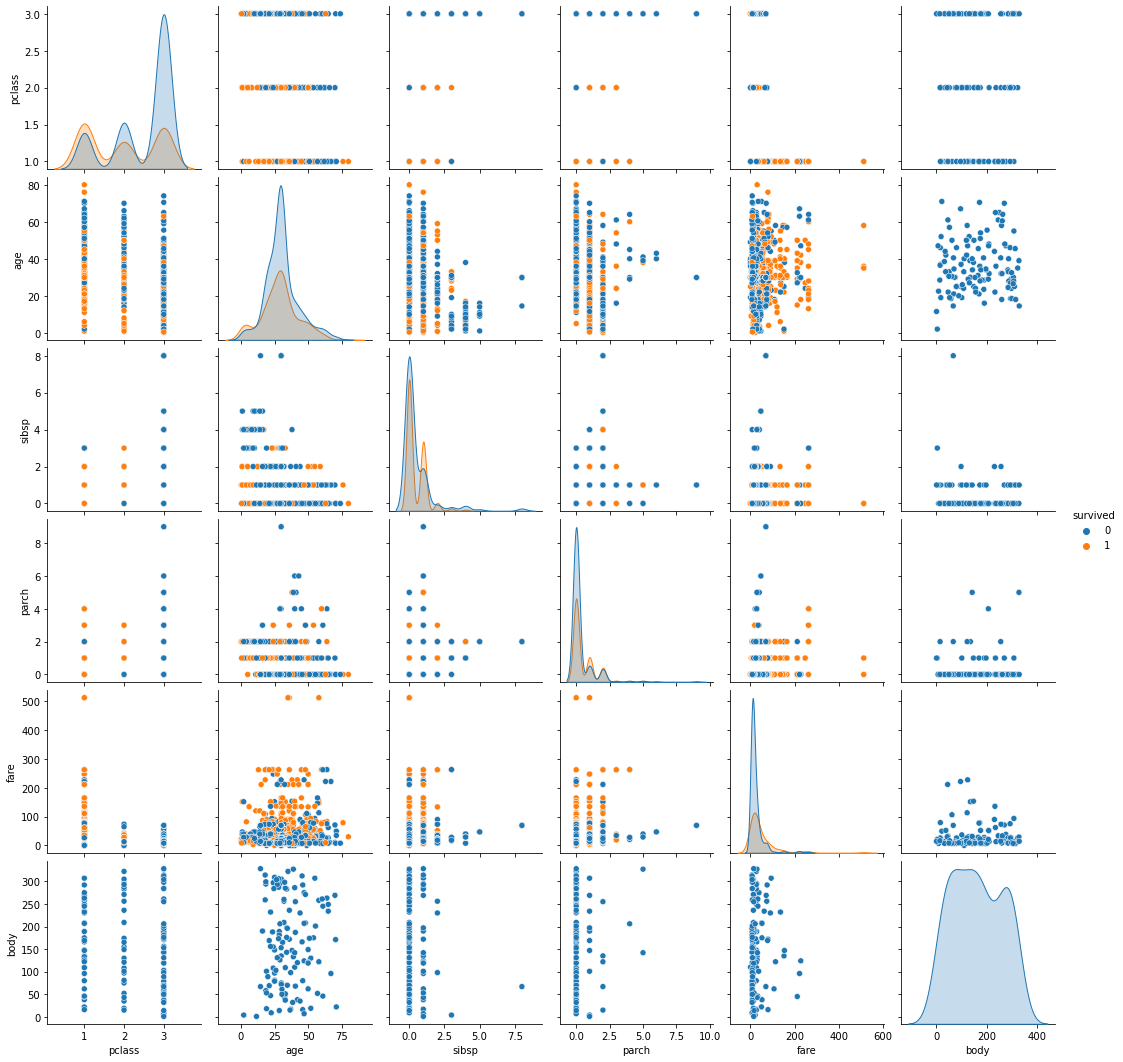

In [13]:
sns.pairplot(data=df, hue="survived");

# Replace the value of female to1 and male to 0

In [7]:
df['sex'] = df['sex'].replace({'female': 1, 'male': 0})

# Dropping the columns

In [8]:
df=df.drop(['name','cabin','ticket','home.dest','boat','body'],axis=1)

In [14]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,29.0000,0,0,211.3375,S
1,1,1,0,0.9167,1,2,151.5500,S
2,1,0,1,2.0000,1,2,151.5500,S
3,1,0,0,30.0000,1,2,151.5500,S
4,1,0,1,25.0000,1,2,151.5500,S


# create dummy variable for  embarked

In [15]:
dummy_columns = ['embarked']

In [16]:
df_dummies = pd.get_dummies(df, columns=dummy_columns)

In [17]:
df_dummies.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,1,29.0000,0,0,211.3375,0,0,1
1,1,1,0,0.9167,1,2,151.5500,0,0,1
2,1,0,1,2.0000,1,2,151.5500,0,0,1
3,1,0,0,30.0000,1,2,151.5500,0,0,1
4,1,0,1,25.0000,1,2,151.5500,0,0,1


In [18]:
X = df_dummies.drop('survived', axis=1)
X

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,29.000000,0,0,211.3375,0,0,1
1,1,0,0.916700,1,2,151.5500,0,0,1
2,1,1,2.000000,1,2,151.5500,0,0,1
3,1,0,30.000000,1,2,151.5500,0,0,1
4,1,1,25.000000,1,2,151.5500,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,1,14.500000,1,0,14.4542,1,0,0
1305,3,1,29.881135,1,0,14.4542,1,0,0
1306,3,0,26.500000,0,0,7.2250,1,0,0
1307,3,0,27.000000,0,0,7.2250,1,0,0


In [19]:
y =df_dummies['survived']
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

# Splitting the Data into Training and Testing Sets

In [20]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=38)

# Scaling the Data Sets

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()

In [159]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.85487468,  1.36692836,  0.01118906, ..., -0.50983115,
        -0.31406351,  0.64855543],
       [ 0.85487468,  1.36692836, -0.2825783 , ..., -0.50983115,
        -0.31406351,  0.64855543],
       [-1.53512209,  1.36692836,  0.70140607, ...,  1.96143372,
        -0.31406351, -1.54188824],
       ...,
       [ 0.85487468, -0.73156723,  0.01118906, ..., -0.50983115,
        -0.31406351,  0.64855543],
       [-1.53512209, -0.73156723,  1.60969935, ...,  1.96143372,
        -0.31406351, -1.54188824],
       [-1.53512209, -0.73156723, -0.96379826, ..., -0.50983115,
        -0.31406351,  0.64855543]])

In [160]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[ 0.85487468, -0.73156723,  0.01118906, ..., -0.50983115,
         3.18406939, -1.54188824],
       [-1.53512209, -0.73156723,  0.01118906, ..., -0.50983115,
        -0.31406351,  0.64855543],
       [-0.3401237 , -0.73156723,  0.01118906, ..., -0.50983115,
        -0.31406351,  0.64855543],
       ...,
       [ 0.85487468,  1.36692836, -0.66103383, ..., -0.50983115,
         3.18406939, -1.54188824],
       [-1.53512209,  1.36692836, -1.03948936, ...,  1.96143372,
        -0.31406351, -1.54188824],
       [ 0.85487468,  1.36692836,  0.01118906, ...,  1.96143372,
        -0.31406351, -1.54188824]])

# Instantiating the KNeighborsClassifier Class

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
knn_model= KNeighborsClassifier(n_neighbors=4)

In [163]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

# Predicting the Results

In [164]:
y_pred = knn_model.predict(scaled_X_test)

In [165]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

# Evaluating the Model Performance¶

In [166]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [167]:
confusion_matrix(y_test, y_pred)

array([[149,  14],
       [ 33,  66]], dtype=int64)

In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.82      0.67      0.74        99

    accuracy                           0.82       262
   macro avg       0.82      0.79      0.80       262
weighted avg       0.82      0.82      0.82       262



In [169]:
print(accuracy_score(y_test, y_pred))

0.8206106870229007
